In [ ]:
# mengkoneksikan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library
import pandas as pd
import numpy as np
#from datetime import date
from IPython.display import Image
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
%ls


drive/  sample_data/


In [ ]:
# import dataset kedalam program python
event_df = pd.read_csv('drive/MyDrive/dataset/gabungan_1.csv', delimiter=';')

In [ ]:
event_df.head()

,CaseID,Activity,Timestamp
0,329579,a,31/05/2021 16:11
1,329579,b,31/05/2021 16:12
2,329579,c,21/07/2021 00:00
3,329579,d,21/07/2021 08:53
4,329579,f,03/08/2021 00:00


In [ ]:
print('{} rows and {} columns.'.format(event_df.shape[0], event_df.shape[1]))


1210 rows and 3 columns.


In [ ]:
events = event_df


In [ ]:
# merubah nama colum yang digunakan pada dataset
events.rename(columns={'CaseID':'case',
                       'Activity':'label',
                       'Timestamp':'datetime'
                       }, inplace=True)

In [ ]:
events.head()


,case,label,datetime
0,329579,a,31/05/2021 16:11
1,329579,b,31/05/2021 16:12
2,329579,c,21/07/2021 00:00
3,329579,d,21/07/2021 08:53
4,329579,f,03/08/2021 00:00


In [ ]:
events.dtypes


case         int64
label       object
datetime    object
dtype: object

In [ ]:
events['case'] = events.astype(str)

ValueError: ignored

In [ ]:
events['datetime'] = pd.to_datetime(events['datetime'])


In [ ]:
events.dtypes


case                 int64
label               object
datetime    datetime64[ns]
dtype: object

In [ ]:
events.isna().sum()


case        0
label       0
datetime    0
dtype: int64

In [ ]:
events.head()


,case,label,datetime
0,329579,a,2021-05-31 16:11:00
1,329579,b,2021-05-31 16:12:00
2,329579,c,2021-07-21 00:00:00
3,329579,d,2021-07-21 08:53:00
4,329579,f,2021-03-08 00:00:00


In [ ]:
!pip install pm4py


     |████████████████████████████████| 1.8 MB 5.6 MB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23594 sha256=f97034c2d58ab46549e8cb4111f130c2671aa1766ba0361f04709c9907189fba
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built stringdist


In [ ]:
events.rename(columns={'datetime': 'time:timestamp', 'case': 'case:concept:name', 'label': 'concept:name'}, inplace=True)


In [ ]:
from pm4py.algo.filtering.pandas.start_activities import start_activities_filter
log_start = start_activities_filter.get_start_activities(events)
df_start_activities = start_activities_filter.apply(events, ["a","b"])

In [ ]:
df_start_activities


,case:concept:name,concept:name,time:timestamp
0,329579,a,2021-05-31 16:11:00
1,329579,b,2021-05-31 16:12:00
2,329579,c,2021-07-21 00:00:00
3,329579,d,2021-07-21 08:53:00
4,329579,f,2021-03-08 00:00:00
...,...,...,...
1205,329274,c,2021-06-25 00:00:00
1206,329274,d,2021-06-26 11:35:00
1207,329274,e,2021-07-13 12:53:00
1208,329274,f,2021-07-22 00:00:00


In [ ]:
from pm4py.algo.filtering.pandas.end_activities import end_activities_filter
end_activities = end_activities_filter.get_end_activities(df_start_activities)
filtered_df = end_activities_filter.apply(df_start_activities, ["g"])

In [ ]:
filtered_df


,case:concept:name,concept:name,time:timestamp
0,329579,a,2021-05-31 16:11:00
1,329579,b,2021-05-31 16:12:00
2,329579,c,2021-07-21 00:00:00
3,329579,d,2021-07-21 08:53:00
4,329579,f,2021-03-08 00:00:00
...,...,...,...
1205,329274,c,2021-06-25 00:00:00
1206,329274,d,2021-06-26 11:35:00
1207,329274,e,2021-07-13 12:53:00
1208,329274,f,2021-07-22 00:00:00


In [ ]:
from pm4py.statistics.traces.generic.pandas import case_statistics
variants_count = case_statistics.get_variant_statistics(filtered_df)
variants_count = sorted(variants_count, key=lambda x: x['case:concept:name'], reverse=True)

In [ ]:
variants_count

[{'case:concept:name': 135, 'variant': 'a,b,c,d,e,f,g'},
 {'case:concept:name': 18, 'variant': 'a,b,c,d,f,e,g'},
 {'case:concept:name': 6, 'variant': 'b,a,c,d,e,f,g'},
 {'case:concept:name': 1, 'variant': 'b,a,c,d,f,e,g'}]

In [ ]:
df = pd.DataFrame(variants_count)


In [ ]:
df

,variant,case:concept:name
0,"a,b,c,d,e,f,g",135
1,"a,b,c,d,f,e,g",18
2,"b,a,c,d,e,f,g",6
3,"b,a,c,d,f,e,g",1


In [ ]:
from pm4py.objects.conversion.log import converter as log_converter

# mengkonversi dataset csv kedalam bentuk format log XES
log = log_converter.apply(filtered_df)

In [ ]:
log

[{'attributes': {'concept:name': 329579}, 'events': [{'concept:name': 'a', 'time:timestamp': Timestamp('2021-05-31 16:11:00')}, '..', {'concept:name': 'g', 'time:timestamp': Timestamp('2021-05-08 11:23:00')}]}, '....', {'attributes': {'concept:name': 329274}, 'events': [{'concept:name': 'a', 'time:timestamp': Timestamp('2021-05-25 11:56:00')}, '..', {'concept:name': 'g', 'time:timestamp': Timestamp('2021-07-24 12:17:00')}]}]

In [ ]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

net, initial_marking, final_marking = alpha_miner.apply(log)

/usr/local/lib/python3.7/dist-packages/pm4py/visualization/petrinet/__init__.py:20: UserWarning: please use the pm4py.visualization.petri_net package instead
  warnings.warn("please use the pm4py.visualization.petri_net package instead")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  This is separate from the ipykernel package so we can avoid doing imports until


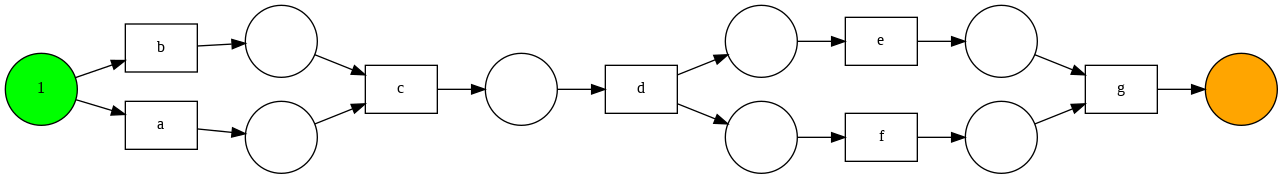

ValueError: ignored

In [ ]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer

gviz = pn_visualizer.apply(net, initial_marking, final_marking)
Image(pn_visualizer.view(gviz))

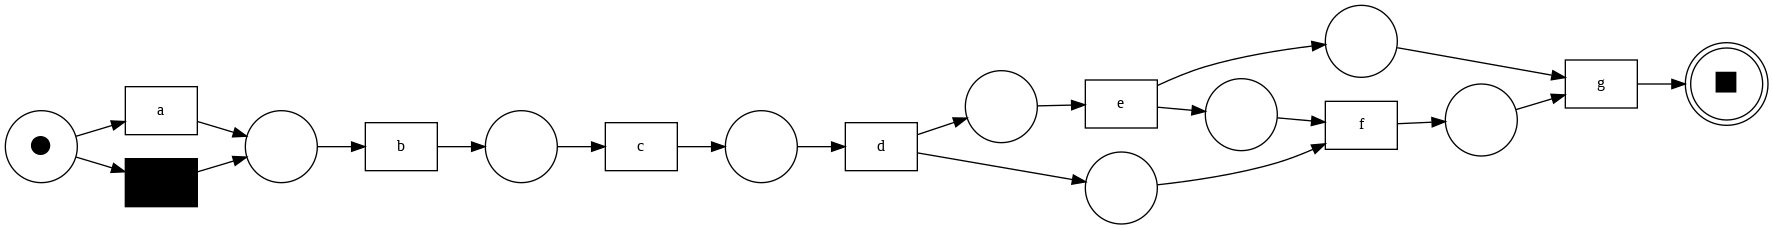

In [ ]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
net, im, fm = heuristics_miner.apply(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.80})


from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

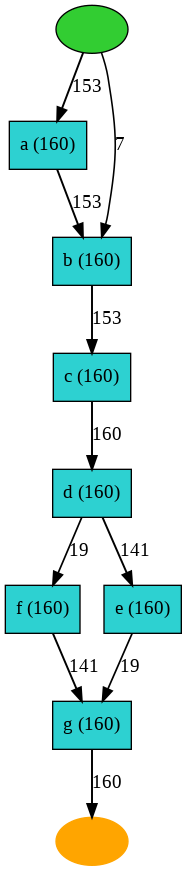

In [ ]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.80})



from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

In [ ]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log)
pn_visualizer.save(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/4 [00:00<?, ?it/s]

TypeError: ignored

In [ ]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
parameters = {dfg_visualization.Variants.PERFORMANCE.value.Parameters.FORMAT: "svg"}
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE, parameters=parameters)
dfg_visualization.save(gviz, "dfgg.svg")

replaying log with TBR, completed variants ::   0%|          | 0/4 [00:00<?, ?it/s]

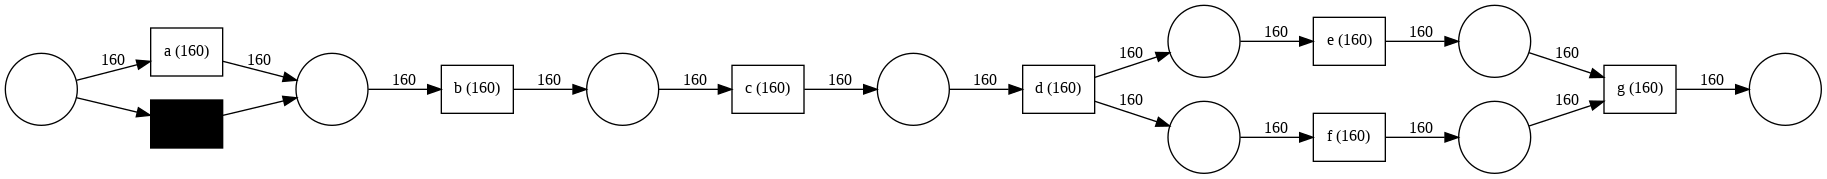

ValueError: ignored

In [ ]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log)

img = pn_visualizer.view(gviz)
Image(img)


# New Section

In [ ]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.PERFORMANCE, log=log)
pn_visualizer.save(gviz, "inductive_frequency.png")

In [ ]:
filtered_df


,case:concept:name,concept:name,time:timestamp
0,329579,a,2021-05-31 16:11:00
1,329579,b,2021-05-31 16:12:00
2,329579,c,2021-07-21 00:00:00
3,329579,d,2021-07-21 08:53:00
4,329579,f,2021-03-08 00:00:00
...,...,...,...
1205,329274,c,2021-06-25 00:00:00
1206,329274,d,2021-06-26 11:35:00
1207,329274,e,2021-07-13 12:53:00
1208,329274,f,2021-07-22 00:00:00


In [ ]:
import pm4py
import os

ocdfg = pm4py.discover_ocdfg(log)
# views the model with the performance annotation
pm4py.view_ocdfg(ocdfg, format="svg", annotation="performance", performance_aggregation="median")

AttributeError: ignored

In [ ]:
from pm4py.statistics.traces.generic.log import case_statistics
median_case_duration = case_statistics.get_median_case_duration(log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"
})

In [ ]:
median_case_duration

2160660.0

In [ ]:

import os
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg_perf = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
from pm4py.statistics.start_activities.log import get as start_activities
from pm4py.statistics.end_activities.log import get as end_activities
sa = start_activities.get_start_activities(log)
ea = end_activities.get_end_activities(log)

In [ ]:
from pm4py.statistics.traces.generic.log import case_arrival
ratio = case_arrival.get_case_arrival_avg(log)
print(ratio)

3356.603773584906


In [ ]:
from pm4py.objects.conversion.dfg import converter
net, im, fm = converter.apply(dfg_perf, variant=converter.Variants.VERSION_TO_PETRI_NET_ACTIVITY_DEFINES_PLACE,
                              parameters={converter.Variants.VERSION_TO_PETRI_NET_ACTIVITY_DEFINES_PLACE.value.Parameters.START_ACTIVITIES: sa,
                                          converter.Variants.VERSION_TO_PETRI_NET_ACTIVITY_DEFINES_PLACE.value.Parameters.END_ACTIVITIES: ea})
simulated_log = dfg_playout.apply(dfg, sa, ea, parameters=parameters)

img = pn_visualizer.view(simulated_log)
Image(img)

                                    

AttributeError: ignored

In [ ]:
from pm4py.algo.simulation.montecarlo import simulator as montecarlo_simulation
from pm4py.algo.conformance.tokenreplay.algorithm import Variants
parameters = {}
parameters[
    montecarlo_simulation.Variants.PETRI_SEMAPH_FIFO.value.Parameters.TOKEN_REPLAY_VARIANT] = Variants.BACKWARDS
parameters[montecarlo_simulation.Variants.PETRI_SEMAPH_FIFO.value.Parameters.total_cases_time]
simulated_log, res = montecarlo_simulation.apply(log, net, im, fm, parameters=parameters)
                                    

AttributeError: ignored

In [ ]:
import random
last_timestamp = max(event["time:timestamp"] for trace in log for event in trace).timestamp()
first_timestamp = min(event["time:timestamp"] for trace in log for event in trace).timestamp()
pick_trans = random.choice(list(res["transitions_interval_trees"]))
print(pick_trans)
n_div = 10
i = 0
res = montecarlo_simulation.apply(log, net, im, fm, parameters=parameters)
while i < n_div:
    timestamp = first_timestamp + (last_timestamp - first_timestamp)/n_div * i
    print("\t", timestamp, len(res["transitions_interval_trees"][pick_trans][timestamp]))
    i = i + 1




NameError: ignored

In [ ]:
from pm4py.objects.log.importer.xes import importer as xes_importer
import os

In [ ]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

tree = inductive_miner.apply_tree(log)

In [ ]:
from pm4py.algo.simulation.playout.process_tree import algorithm as tree_playout

playout_variant = tree_playout.Variants.EXTENSIVE
param = tree_playout.Variants.EXTENSIVE.value.Parameters

simulated_log = tree_playout.apply(tree, variant=playout_variant,
                                   parameters={param.MAX_TRACE_LENGTH: 3, param.MAX_LIMIT_NUM_TRACES: 100000})
print(len(simulated_log))

0


In [ ]:
from pm4py.statistics.traces.generic.log import case_arrival
ratio = case_arrival.get_case_arrival_avg(log)
print(ratio)
                  

3356.603773584906


In [ ]:
import random
last_timestamp = max(event["time:timestamp"] for trace in log for event in trace).timestamp()
first_timestamp = min(event["time:timestamp"] for trace in log for event in trace).timestamp()
pick_trans = random.choice(list(res["transitions_interval_trees"]))
print(pick_trans)
n_div = 10
i = 0
while i < n_div:
    timestamp = first_timestamp + (last_timestamp - first_timestamp)/n_div * i
    print("\t", timestamp, len(res["transitions_interval_trees"][pick_trans][timestamp]))
    i = i + 1

NameError: ignored

In [ ]:
from pm4py.objects.conversion.dfg import converter
net, im, fm = converter.apply(dfg_perf, variant=converter.Variants.VERSION_TO_PETRI_NET_ACTIVITY_DEFINES_PLACE,
                              parameters={converter.Variants.VERSION_TO_PETRI_NET_ACTIVITY_DEFINES_PLACE.value.Parameters.START_ACTIVITIES: sa,
                                          converter.Variants.VERSION_TO_PETRI_NET_ACTIVITY_DEFINES_PLACE.value.Parameters.END_ACTIVITIES: ea})

                                    

In [ ]:
import pm4py
dfg, sa, ea = pm4py.discover_directly_follows_graph(log)
activities_count = pm4py.get_attribute_values(log, "concept:name")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecatedWarning: get_attribute_values is deprecated as of 2.2.10 and will be removed in 3.0.0. please use get_event_attribute_values instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from pm4py.algo.simulation.playout.dfg import algorithm as dfg_playout
parameters = {parameters.(TIMESTAMP_KEY["time:timestamp"])}
simulated_log = dfg_playout.apply(dfg, sa, ea, parameters=parameters)

SyntaxError: ignored

In [ ]:
from pm4py.objects.log.util import insert_classifier
log, activity_key = insert_classifier.insert_activity_classifier_attribute(log, "Activity classifier")

In [ ]:
from pm4py.statistics.traces.generic.log import case_statistics
all_case_durations = case_statistics.get_all_case_durations(log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"})

In [ ]:
from pm4py.statistics.traces.generic.log import case_statistics
median_case_duration = case_statistics.get_median_case_duration(log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"
})


AttributeError: ignored

In [ ]:
median_case_duration

2499720.0

In [ ]:
all_case_durations

[-12451080.0,
 -12446040.0,
 -12430740.0,
 -12429360.0,
 -12265020.0,
 -12197460.0,
 -12186660.0,
 -12186360.0,
 -12186360.0,
 -12179400.0,
 -9442140.0,
 -9347700.0,
 -9337500.0,
 -7110300.0,
 -6898800.0,
 -4769220.0,
 -4751400.0,
 -4746360.0,
 -4385220.0,
 -2058180.0,
 -2058060.0,
 -2004480.0,
 -1993140.0,
 -1883820.0,
 -1883100.0,
 -1673340.0,
 -1549320.0,
 187020.0,
 332340.0,
 871140.0,
 927540.0,
 1193820.0,
 1382700.0,
 1385880.0,
 1468920.0,
 1536240.0,
 1555380.0,
 1581780.0,
 1745640.0,
 1807560.0,
 1809240.0,
 1809300.0,
 1816080.0,
 1969740.0,
 1978320.0,
 1978560.0,
 1984680.0,
 1993500.0,
 1994700.0,
 2000040.0,
 2005560.0,
 2011140.0,
 2068200.0,
 2068800.0,
 2069160.0,
 2072100.0,
 2080740.0,
 2081820.0,
 2081940.0,
 2090460.0,
 2094060.0,
 2144160.0,
 2156640.0,
 2160660.0,
 2173260.0,
 2173920.0,
 2174040.0,
 2174700.0,
 2176080.0,
 2241480.0,
 2244540.0,
 2255640.0,
 2257500.0,
 2263980.0,
 2326860.0,
 2331720.0,
 2341140.0,
 2381880.0,
 2403060.0,
 2496540.0,
 249972

In [ ]:
from pm4py.objects.log.util import interval_lifecycle
enriched_log = interval_lifecycle.assign_lead_cycle_time(log)

In [ ]:
enriched_log

[{'attributes': {'concept:name': '329579'}, 'events': [{'concept:name': 'f', 'case:concept:name': '329579', 'start_timestamp': Timestamp('2021-03-08 00:00:00'), 'time:timestamp': Timestamp('2021-03-08 00:00:00'), '@@duration': 0.0, '@@approx_bh_partial_cycle_time': 0, '@@approx_bh_partial_lead_time': 0, '@@approx_bh_overall_wasted_time': 0, '@@approx_bh_this_wasted_time': 0, '@approx_bh_ratio_cycle_lead_time': 1}, '..', {'concept:name': 'd', 'case:concept:name': '329579', 'start_timestamp': Timestamp('2021-07-21 08:53:00'), 'time:timestamp': Timestamp('2021-07-21 08:53:00'), '@@duration': 0.0, '@@approx_bh_partial_cycle_time': 0, '@@approx_bh_partial_lead_time': 3498780, '@@approx_bh_overall_wasted_time': 3498780, '@@approx_bh_this_wasted_time': 6780, '@approx_bh_ratio_cycle_lead_time': 0.0}]}, '....', {'attributes': {'concept:name': '329274'}, 'events': [{'concept:name': 'a', 'case:concept:name': '329274', 'start_timestamp': Timestamp('2021-05-25 11:56:00'), 'time:timestamp': Timestam

In [ ]:
import os
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg_perf = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
from pm4py.statistics.start_activities.log import get as start_activities
from pm4py.statistics.end_activities.log import get as end_activities
sa = start_activities.get_start_activities(log)
ea = end_activities.get_end_activities(log)

In [ ]:
sa

{'a': 153, 'b': 7}

In [ ]:
ea

{'g': 160}

In [ ]:
from pm4py.statistics.traces.generic.log import case_arrival
ratio = case_arrival.get_case_arrival_avg(log)
print(ratio)

3356.603773584906


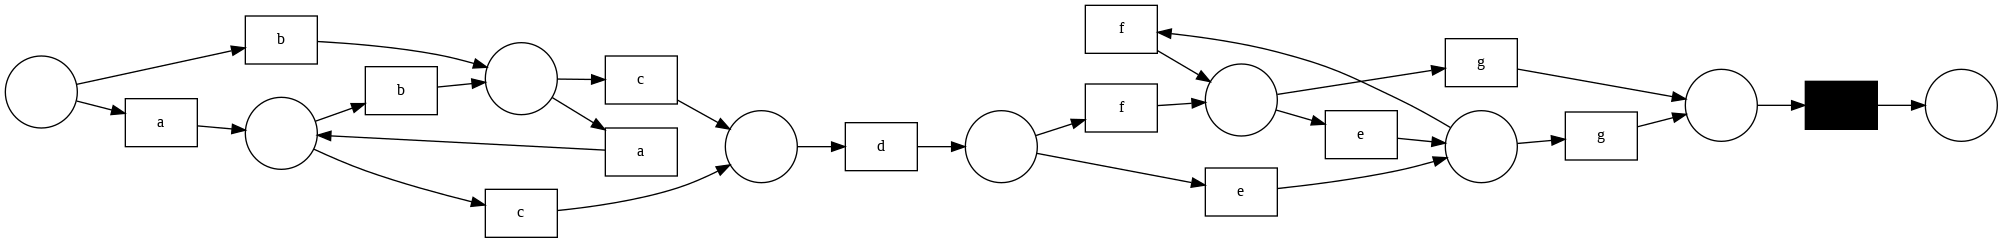

ValueError: ignored

In [ ]:
from pm4py.objects.conversion.dfg import converter
net, im, fm = converter.apply(dfg_perf, variant=converter.Variants.VERSION_TO_PETRI_NET_ACTIVITY_DEFINES_PLACE,
                              parameters={converter.Variants.VERSION_TO_PETRI_NET_ACTIVITY_DEFINES_PLACE.value.Parameters.START_ACTIVITIES: sa,
                                          converter.Variants.VERSION_TO_PETRI_NET_ACTIVITY_DEFINES_PLACE.value.Parameters.END_ACTIVITIES: ea})

gviz = pn_visualizer.apply(net, initial_marking, final_marking)
Image(pn_visualizer.view(gviz))

In [ ]:
from pm4py.algo.simulation.montecarlo import simulator as montecarlo_simulation
from pm4py.algo.conformance.tokenreplay.algorithm import Variants
parameters = {}
parameters[
    montecarlo_simulation.Variants.PETRI_SEMAPH_FIFO.value.Parameters.TOKEN_REPLAY_VARIANT] = Variants.BACKWARDS
parameters[montecarlo_simulation.Variants.PETRI_SEMAPH_FIFO.value.Parameters.PARAM_CASE_ARRIVAL_RATIO] = 10800
simulated_log, res = montecarlo_simulation.apply(log, net, im, fm, parameters=parameters)

INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_fifo:1638923283.2861392 started the replay operation.
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


FitDataError: ignored

In [ ]:

import random

last_timestamp = max(event["time:timestamp"] for trace in log for event in trace).timestamp()
first_timestamp = min(event["time:timestamp"] for trace in log for event in trace).timestamp()
res = montecarlo_simulation.apply(log, net, im, fm)
pick_trans = random.choice(list(res["total_cases_time"]))
print(pick_trans)
n_div = 10
i = 0
while i < n_div:
    timestamp = first_timestamp + (last_timestamp - first_timestamp)/n_div * i
    print("\t", timestamp, len(res["total_cases_time"][pick_trans][timestamp]))
    i = i + 1

INFO:pm4py.algo.simulation.montecarlo.variants.petri_semaph_fifo:1638923979.10566 started the replay operation.


replaying log with TBR, completed variants ::   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


FitDataError: ignored

In [ ]:
import pm4py

path = "drive/MyDrive/dataset/event_log_python7.csv"
ocel = pm4py.read_ocel(path)

KeyError: ignored

In [ ]:
gviz = pn_visualizer.apply(simulated_log)
Image(pn_visualizer.view(gviz))

AttributeError: ignored

replaying log with TBR, completed variants ::   0%|          | 0/4 [00:00<?, ?it/s]

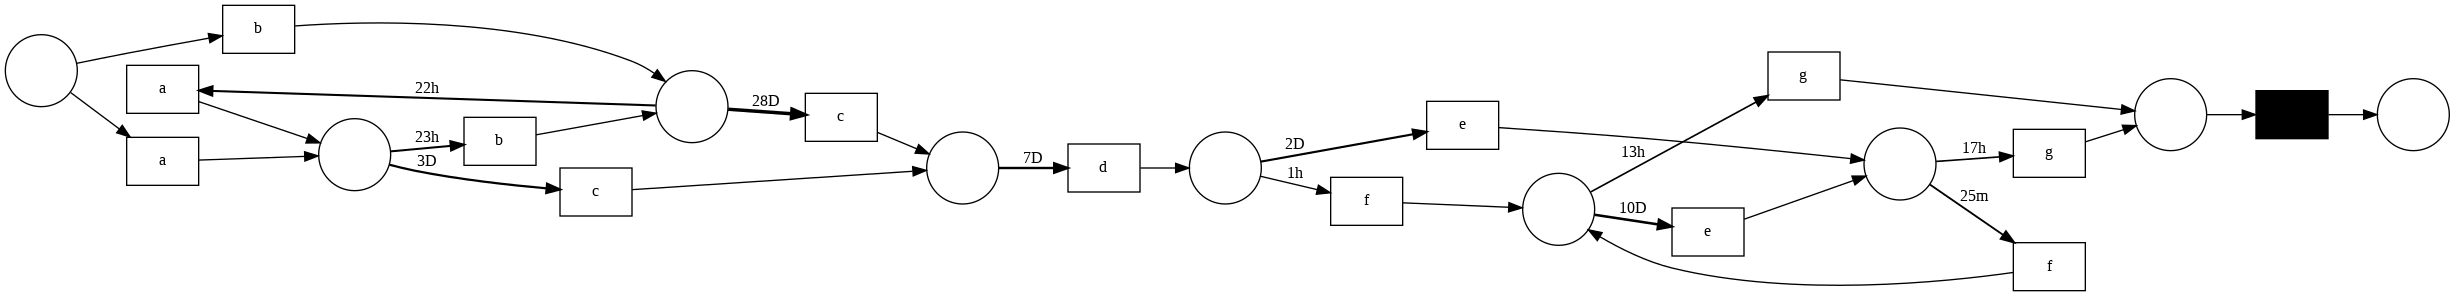

ValueError: ignored

In [ ]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.PERFORMANCE, log=log)

img = pn_visualizer.view(gviz)
Image(img)